# Initialize

In [5]:
!nvidia-smi

Fri Nov 13 19:19:16 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 108...  Off  | 00000000:01:00.0 Off |                  N/A |
|  0%   38C    P8     9W / 250W |    627MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:02:00.0 Off |                  N/A |
|  0%   39C    P8     9W / 250W |     10MiB / 11178MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [6]:
# pip install allennlp --upgrade

In [7]:
%load_ext autoreload
%autoreload 2

import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

#
1. To test system and code
2. To max efficiency

In [8]:
# !pip uninstall -y actleto
# !pip install -e git+https://github.com/IINemo/active_learning_toolbox.git@seq#egg=actleto

In [9]:
# !  git clone https://github.com/randomunrandom/text_selector.git
# !cd text_selector; pip install -e .
# ! jupyter nbextension install --py --symlink --sys-prefix text_selector
# ! jupyter nbextension enable --py --sys-prefix text_selector
# ! jupyter labextension install js

In [10]:
# !pip install allennlp==1.0.0rc5

In [11]:
from active_learning_system_allennlp import ALSystem
# from active_learning_system_allennlp import ALSystem
from configs import default as MAIN_CONFIG



In [12]:
save_path = '../../../results/miron'
system = ALSystem(config=MAIN_CONFIG, save_path=save_path)

# Load dataset

In [13]:
dataset_path = '../../data/hypertension2'
system.load_dataset(dataset_path)

2020-11-13 19:19:26,463 Reading data from ../../data/hypertension2
2020-11-13 19:19:26,465 Train: ../../data/hypertension2/train.txt
2020-11-13 19:19:26,466 Dev: ../../data/hypertension2/dev.txt
2020-11-13 19:19:26,467 Test: ../../data/hypertension2/test.txt


Tags: ['hyp']
self.X_train[:1]:
[['заключительный', 'Ишемическая', 'болезнь', 'сердца', 'при', 'неизмененных', 'коронарных', 'артериях', ',', 'стенокардия', 'напряжения', 'II', 'ФК', '.']]
self.X_helper.head():
                                               texts
0  заключительный Ишемическая болезнь сердца при ...
1                                   Гиперлипидемия .
2   Начальный атеросклероз брахиоцефальных артерий .
3  Гипертоническая болезнь 2 стадии , 1 степени ,...
4                       Нарушение гликемии натощак .


In [14]:
# system.load_train_dataset(dataset_path, 1)

# Load annotation

In [15]:
annotation_path = '../../../results/miron'
system.load_annotations(annotation_path)

In [16]:
import numpy as np 
a = np.load(annotation_path+'/annotation.npy', allow_pickle=True)
b = a.tolist()
for i in b:
    if i is not None:
        print(i)

['None']
['None']
['None']
['None']
[{'start': 19, 'end': 40, 'tag': 'hyp'}]
[{'start': 2, 'end': 24, 'tag': 'hyp'}]
[{'start': 19, 'end': 40, 'tag': 'hyp'}]
['None']
['None']
['None']
[{'start': 19, 'end': 40, 'tag': 'hyp'}]
[{'start': 0, 'end': 22, 'tag': 'hyp'}]
[{'start': 0, 'end': 22, 'tag': 'hyp'}]
[{'start': 0, 'end': 22, 'tag': 'hyp'}]
[{'start': 0, 'end': 22, 'tag': 'hyp'}]
[{'start': 0, 'end': 22, 'tag': 'hyp'}]
['None']
['None']
[{'start': 2, 'end': 24, 'tag': 'hyp'}]
['None']
[{'start': 0, 'end': 22, 'tag': 'hyp'}]
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
['None']
[{'start': 0, 'end': 22, 'tag': 'hyp'}]
['None']
['None']
['None']
[{'start': 0,

# Create model

In [17]:
system.create_active_learner()

Number of all valid examples:  19
Number of all training examples:  164


# Annotate custom examples

In [18]:
custom_examples = [
#     ('митральный порок сердца', 150),
#     ('Протезирование аортального клапана', 10),
#     ('двустворчатый аортальный клапан', 10),
#     ('протезирования аортального клапана', 10),
#     ('отрыв хорд передней створки митрального клапана', 10),
#     ('Недостаточность митрального 2 - 3 ст и трикуспидального клапана 3 ст .', 10),
#     ('пластики кольца митрального клапана', 10),
#     ('Сочетанный митральный порок', 10),
#     ('Трикуспидальная недостаточность', 10),
#     ('недостаточность митрального клапана', 10),
#     ('заключительный Ревматизм : неактивная фаза , митральный порок сердца .', 200),
#     ('Врожденный порок сердца : двустворчатый аортальный клапан , недостаточность аортального клапана 1 степени . ', 200),
#     ('ПКА , протезирования аортального клапана механическим двустворчатым протезом АТ 5 № 23 от 27 . ', 200),
#     ('клинический предварительный порок сердца : пролабирование , дисплазия створок митрального клапана , отрыв хорд передней створки митрального клапана , относительная недостаточность митрального клапана ( 4 ст ) , трикуспидального клапана ( 3 ст ) , нарушения ритма и проводимости : блокада левой ножки п . O', 200),    
#     ('Недостаточность митрального 2 - 3 ст и трикуспидального клапана 3 ст . . ', 200),
#     ('Состояние после аорто - коронарного шунтирования , маммаро - коронарного шунтирования , аневризмэктомии и пластики кольца митрального клапана от 2004 года . ', 200),
#     ('заключительный Ревматизм : неактивная фаза , митральный порок сердца . ', 200),
#     ('Недостаточность митрального клапана II степени , трикуспидального клапана II степени , легочного клапана II - III степени . ', 200),
#     ('Сочетанный митральный порок . ', 200),
#     ('Трикуспидальная недостаточность IV ст . ', 200),
#     ('Недостаточность трикуспидального клапана 2 степени ; недостаточность митрального клапана 2 - 3 степени .', 200)
    ('Артериальная гипертония', 10),
    ('Гипертоническая болезнь', 20)
]

system.create_custom_annotator_widget(custom_examples)

AnnotatorWidget(children=(VBox(children=(HBox(children=(Button(description='Prev', style=ButtonStyle()), Butto…

In [14]:
# system.custom_annotation_widget.get_answers().tolist()

In [19]:
system.add_custom_examples()

type of custom_examples: <class 'list'>
custom_examples: [('Артериальная гипертония', 10), ('Гипертоническая болезнь', 20)]
answer: [{'start': 0, 'end': 22, 'tag': 'hyp'}]
rep: 10
answer: [{'start': 0, 'end': 22, 'tag': 'hyp'}]
rep: 20


# Creating widget for annotation

In [20]:
system.create_active_learning_widget()

score 1.0650768314175316
score type <class 'list'>


ActiveLearnerUiWidget(children=(HBox(children=(Button(description='Next iteration', style=ButtonStyle()), Labe…

Number of updated examples 119
Number of all valid examples:  35
Number of all training examples:  307


score 1.0583603463951305
score type <class 'list'>


# Evaluate

In [21]:
system.evaluate()

F1_score: 0.6949602122015914 , precision: 0.7043010752688172 , recall: 0.6858638743455497
Evaluation results for multiple iterations:
[0.6949602122015914]


# Predict on custom examples

In [22]:
# text = """
# У пациента артериальная гипертония. АААА. что делать. 
# А у другого артериальная гипертензия. По-моему это одно и то же.
# Гипертоническая болезнь?
# """
text = 'У пациента артериальная гипертония. АААА. что делать.'
system.parse(text)

[['O', 'O', 'O', 'I-hyp', 'O'], ['O', 'O'], ['O', 'O', 'O']]
[]
[]
[]


In [19]:
# +TODO: save supplementary data
# +TODO: predict with html
# Disable printing

<function matplotlib.pyplot.show(*args, **kw)>

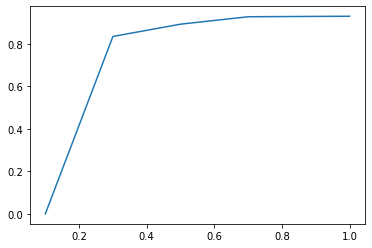

In [8]:
import matplotlib.pyplot as plt
x = [0.1, 0.3, 0.5, 0.7, 1.0]
y = [0.0, 0.8353808353808354, 0.8933002481389578, 0.9282051282051282, 0.9305912596401029]
plt.plot(x, y)
plt.show